In [57]:
# import nessessory library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Collecting Data


**What subject is data about?**<br><br>
In today's modern life, owning a car has become more than just a dream; it's a necessity and a symbol of independence for many people. Cars offer convenience, freedom, and the ability to travel without restrictions, making them a highly desirable asset for individuals and families alike. Recognizing this growing trend and the increasing demand for cars, we are committed to providing comprehensive and up-to-date car information to assist you in making the best choice. Whether you're looking for a reliable family vehicle, a fuel-efficient model, or a car that matches your lifestyle and personality, our insights and recommendations will guide you. With our help, you can confidently select the car that suits your needs, preferences. Let us be your trusted partner on your journey to owning the perfect vehicle!

**What is the source of data** <br><br>
Data is getted on Kaggle with [*Link of Data*](https://www.kaggle.com/datasets/tawfikelmetwally/automobile-dataset?resource=download)

**Do authors of this data allow you to use like this? You can check the data license** <br><br>
It's the public domain so you can use that. You can check license in part **License** of [*Link of Data*](https://www.kaggle.com/datasets/tawfikelmetwally/automobile-dataset?resource=download) and [*Public Domain*](https://creativecommons.org/publicdomain/zero/1.0/)

**How did authors collect data?** <br><br>
Authors is not refer to collecting data. You can check in part **Provenance** in [*Link of Data*](https://www.kaggle.com/datasets/tawfikelmetwally/automobile-dataset?resource=download)

# Exploring Data

### Read data


In [58]:
data_path = './Data/CarInformation.csv'
df = pd.read_csv(data_path)

### How many rows and how many columns?

In [59]:
row, col = df.shape
print("Number of Row: ", row)
print("Number of Column: ", col)

Number of Row:  398
Number of Column:  9


So, the data set have **398** rows and **9** columns. 

### What is the meaning of each row?

In [60]:
df.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


Each row is the information of a car. It look good, hasn't different row. 

### Are there duplicated rows?

In [61]:
df[df.duplicated(keep=False)]

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin


Data set hasn't duplicated row.

### What is the meaning of each column?

In [62]:
list(df.columns.values)

['name',
 'mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model_year',
 'origin']

| Column                  | Description                                                                 |
|-------------------------|-----------------------------------------------------------------------------|
| name                   | Unique identifier for each car.                |
| mpg      | Fuel efficiency measured in miles per gallon. 1 Gallon = 3,785411784 litres                      |
| cylinders                   | Number of cylinders in the engine.                                              |
| displacement        | Engine displacement, indicating its size or capacity.                               |
| horsepower           | Power output of the engine.                                              |
| weight       | Weight of the car.                 |
| acceleration | Capability to increase speed, measured in seconds.                                               |
| model_year | Year of manufacture for the car model.                                              |
| origin| Country or region of origin for each car.                   |


### What is the current data type of each column? Are there columns having inappropriate data types?

In [63]:
df.dtypes

name             object
mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
dtype: object

Each row have correct type. However model_year have value: 70, 80 ... So we format this value of column

In [64]:
print(df['model_year'].max())

82


We see max of model_year is 82(mean 1982). To fast, we can add 1900 into column

In [65]:
df['model_year'] = df['model_year'] + 1900
df['model_year']

0      1970
1      1970
2      1970
3      1970
4      1970
       ... 
393    1982
394    1982
395    1982
396    1982
397    1982
Name: model_year, Length: 398, dtype: int64

### With each numerical column, how are values distributed?

In [66]:
def calculate_value_distributed(df):
    infor = pd.DataFrame()
    for col in df.select_dtypes(include=[np.number]).columns:
        missing_val = df[col].isna().sum()
        missing_per = missing_val / len(df[col]) * 100
        min_val = df[col].min()
        max_val = df[col].max()
        mean_val = df[col].mean()
        median_val = df[col].median()
        lower_percentile = np.percentile(df[col].dropna(), 25) #column horsepower has NaN
        upper_percentile = np.percentile(df[col].dropna(), 75) #column horsepower has NaN
        col_info = pd.Series({
            'num_missing': missing_val,
            'missing_percentage': missing_per,
            'min': min_val,
            'lower_quartile': lower_percentile,
            'median': median_val,
            'mean': mean_val,
            'upper_quartile': upper_percentile,
            'max': max_val
        })
        infor[col] = col_info

    return infor

infor = calculate_value_distributed(df)
infor


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
num_missing,0.000000,0.000000,0.000000,6.000000,0.000000,0.00000,0.00000
missing_percentage,0.000000,0.000000,0.000000,1.507538,0.000000,0.00000,0.00000
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.00000,1970.00000
lower_quartile,17.500000,4.000000,104.250000,75.000000,2223.750000,13.82500,1973.00000
median,23.000000,4.000000,148.500000,93.500000,2803.500000,15.50000,1976.00000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.56809,1976.01005
upper_quartile,29.000000,8.000000,262.000000,126.000000,3608.000000,17.17500,1979.00000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.80000,1982.00000


Ở đây chúng ta thấy cột horsepower có missing vì vậy chúng ta sẽ xoá những dòng có nan đi.

In [67]:
df = df.dropna()

Cột acceleration trong bộ dữ liệu này được tác giả đo bằng giây nghĩa là thời gian cần để tăng tốc. Thời gian tăng tốc càng lâu thì nghĩa là xe có mức độ ổn định tốc độ khá cao. CHúng ta cần chú ý để không bị nhầm lẫn.

## Asking meaningful question

Câu hỏi 1: Xe nào là lý tưởng nhất
Hiện nay giới trẻ rất đam mê tốc độ. Vì vậy với tư cách 1 phần của giới trẻ chúng ta sẽ quan tâm tới các mối quan hệ xung quanh tốc độ để đánh giá xe. Ở đây chúng ta sẽ xem thử những cột nào ảnh hướng tới cột tốc độ bằng cách sử dụng correlation giữa chúng.

Đầu tiên chúng ta sẽ sử dụng hàm corr để hiểu về mối quan hệ giữa chúng

In [ ]:
correlation_matrix = df[['weight', 'acceleration', 'mpg', 'horsepower']].corr()
print("Hệ số tương quan:")
print(correlation_matrix)


Hệ số tương quan:
                weight  acceleration       mpg  horsepower
weight        1.000000     -0.416839 -0.832244    0.864538
acceleration -0.416839      1.000000  0.423329   -0.689196
mpg          -0.832244      0.423329  1.000000   -0.778427
horsepower    0.864538     -0.689196 -0.778427    1.000000


,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,hp_to_weight
0,vw pickup,44.0,4,97.0,52.0,2130,24.6,1982,europe,0.024413
1,vw dasher (diesel),43.4,4,90.0,48.0,2335,23.7,1980,europe,0.020557
2,vw rabbit c (diesel),44.3,4,90.0,48.0,2085,21.7,1980,europe,0.023022
3,volkswagen rabbit custom diesel,43.1,4,90.0,48.0,1985,21.5,1978,europe,0.024181
4,mazda glc,46.6,4,86.0,65.0,2110,17.9,1980,japan,0.030806
5,datsun 210,40.8,4,85.0,65.0,2110,19.2,1980,japan,0.030806
6,toyota corolla tercel,38.1,4,89.0,60.0,1968,18.8,1980,japan,0.030488
7,chevrolet chevette,29.0,4,85.0,52.0,2035,22.2,1976,usa,0.025553
8,toyota starlet,39.1,4,79.0,58.0,1755,16.9,1981,japan,0.033048
9,renault 5 gtl,36.0,4,79.0,58.0,1825,18.6,1977,europe,0.031781


Sau đó chúng ta sẽ chuẩn hoá để tiện tính điểm cho chúng.

In [70]:
mpg = df['mpg']
mpg_norm = (mpg - mpg.min()) / (mpg.max() - mpg.min())

weight = df['weight']
weight_norm = (weight - weight.min()) / (weight.max() - weight.min())

acceleration = df['acceleration']
acceleration_norm = (acceleration - acceleration.min()) / (acceleration.max() - acceleration.min())

horsepower = df['horsepower']
horsepower_norm = (horsepower - horsepower.min()) / (horsepower.max() - horsepower.min())



Tiếp đó chúng ta sẽ lọc ra những xe có điểm cao nhất

In [71]:
score = mpg_norm - weight_norm + acceleration_norm - horsepower_norm
df['score'] = score
score = score.sort_values(ascending=False)
df.loc[score.nlargest(10).index].reset_index(drop = True)

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,hp_to_weight,score
0,vw pickup,44.0,4,97.0,52.0,2130,24.6,1982,europe,0.024413,1.739754
1,vw dasher (diesel),43.4,4,90.0,48.0,2335,23.7,1980,europe,0.020557,1.633841
2,vw rabbit c (diesel),44.3,4,90.0,48.0,2085,21.7,1980,europe,0.023022,1.609612
3,volkswagen rabbit custom diesel,43.1,4,90.0,48.0,1985,21.5,1978,europe,0.024181,1.594145
4,mazda glc,46.6,4,86.0,65.0,2110,17.9,1980,japan,0.030806,1.345112
5,datsun 210,40.8,4,85.0,65.0,2110,19.2,1980,japan,0.030806,1.268238
6,toyota corolla tercel,38.1,4,89.0,60.0,1968,18.8,1980,japan,0.030488,1.240054
7,chevrolet chevette,29.0,4,85.0,52.0,2035,22.2,1976,usa,0.025553,1.224896
8,toyota starlet,39.1,4,79.0,58.0,1755,16.9,1981,japan,0.033048,1.224816
9,renault 5 gtl,36.0,4,79.0,58.0,1825,18.6,1977,europe,0.031781,1.223712


Câu hỏi 2: Khi không biết phải mua xe nào nhưng bạn muốn xe có thể xài lâu và bền hơn. Để lựa được những chiếc xe đó bạn cần lựa chọn nên hãng để mua xe. Vì vậy ở đây chúng ta sẽ tìm ra những nơi nào mà hãng xe có sự cải tiến xe nhiều nhất.

In [72]:

# Lọc các cột cần thiết
data = df[['origin', 'model_year', 'mpg']]

# Tính trung bình mpg theo origin và model_year
mpg_by_origin_year = data.groupby(['origin', 'model_year'])['mpg'].mean().reset_index()

# Tìm năm đầu tiên và năm cuối cùng của mỗi origin
mpg_first_year = mpg_by_origin_year.groupby('origin').first().reset_index()
mpg_last_year = mpg_by_origin_year.groupby('origin').last().reset_index()

# Tính mức độ cải tiến mpg
mpg_improvement = mpg_last_year[['origin', 'mpg']].copy()
mpg_improvement['mpg_start'] = mpg_first_year['mpg']
mpg_improvement['mpg_change'] = mpg_improvement['mpg'] - mpg_improvement['mpg_start']

# Sắp xếp theo mức độ cải tiến
mpg_improvement = mpg_improvement.sort_values(by='mpg_change', ascending=False)

print("Mức độ cải tiến mpg của từng origin:")
print(mpg_improvement)

# Origin cải tiến nhiều nhất
most_improved_origin = mpg_improvement.iloc[0]
print("\nOrigin cải tiến nhiều nhất:")
print(f"Origin: {most_improved_origin['origin']}, Mức cải tiến: {most_improved_origin['mpg_change']:.2f} mpg")


Mức độ cải tiến mpg của từng origin:
   origin        mpg  mpg_start  mpg_change
0  europe  40.000000  25.200000   14.800000
2     usa  29.789474  15.272727   14.516746
1   japan  34.888889  25.500000    9.388889

Origin cải tiến nhiều nhất:
Origin: europe, Mức cải tiến: 14.80 mpg


Câu hỏi 3: Chúng ta sẽ tìm hiểu xu thế sản xuất thay đổi như thế nào? Từ đó phân tích kỹ các xu thế đó. 

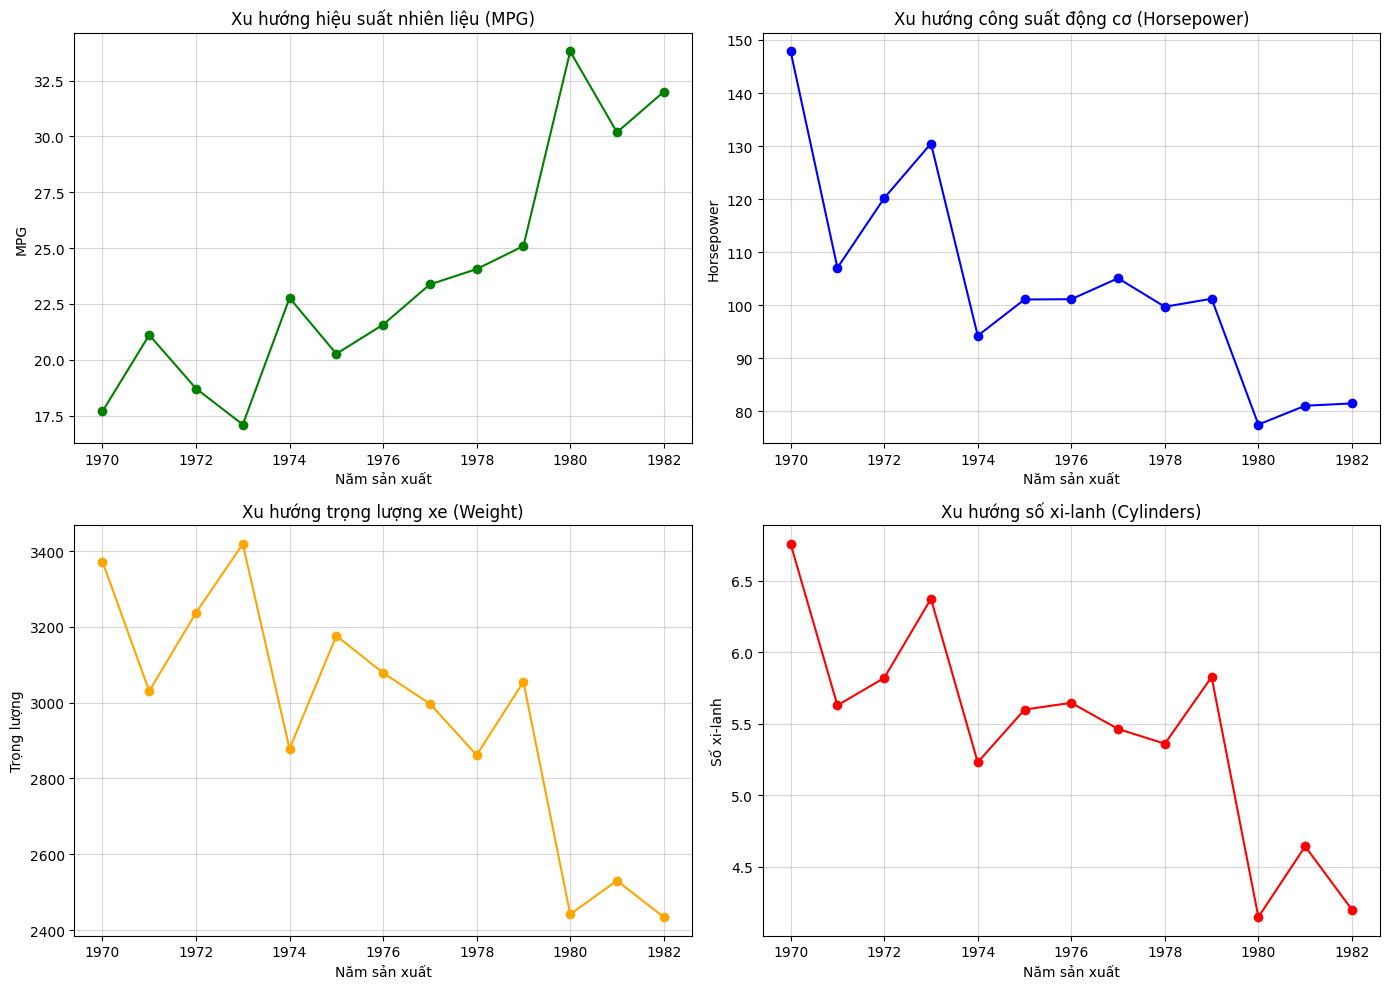

In [73]:



# Tính giá trị trung bình của các thuộc tính theo năm
trends = df.groupby('model_year')[['mpg', 'horsepower', 'weight', 'cylinders']].mean()

# Trực quan hóa xu hướng
plt.figure(figsize=(14, 10))

# Xu hướng hiệu suất nhiên liệu (MPG)
plt.subplot(2, 2, 1)
trends['mpg'].plot(marker='o', color='green')
plt.title('Xu hướng hiệu suất nhiên liệu (MPG)')
plt.xlabel('Năm sản xuất')
plt.ylabel('MPG')
plt.grid(alpha=0.5)

# Xu hướng công suất động cơ (Horsepower)
plt.subplot(2, 2, 2)
trends['horsepower'].plot(marker='o', color='blue')
plt.title('Xu hướng công suất động cơ (Horsepower)')
plt.xlabel('Năm sản xuất')
plt.ylabel('Horsepower')
plt.grid(alpha=0.5)

# Xu hướng trọng lượng xe (Weight)
plt.subplot(2, 2, 3)
trends['weight'].plot(marker='o', color='orange')
plt.title('Xu hướng trọng lượng xe (Weight)')
plt.xlabel('Năm sản xuất')
plt.ylabel('Trọng lượng')
plt.grid(alpha=0.5)

# Xu hướng số xi-lanh (Cylinders)
plt.subplot(2, 2, 4)
trends['cylinders'].plot(marker='o', color='red')
plt.title('Xu hướng số xi-lanh (Cylinders)')
plt.xlabel('Năm sản xuất')
plt.ylabel('Số xi-lanh')
plt.grid(alpha=0.5)

plt.tight_layout()
plt.show()


Qua các biểu đồ trên chúng ta thấy càng về sau thì mức độ tiết kiệm nhiên liệu càng được chú trọng vì vậy chúng ta sẽ phân tích kỹ thuộc tính này.

Tìm hiểu xem các thuộc tính khác ảnh hưởng tới thuộc tính này như thế nào ?

In [74]:
maxtrix_corr = df[['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year']].corr()
maxtrix_corr['mpg']

mpg             1.000000
cylinders      -0.777618
displacement   -0.805127
horsepower     -0.778427
weight         -0.832244
acceleration    0.423329
model_year      0.580541
Name: mpg, dtype: float64

Tiếp đó chúng ta sẽ trực quan hoá để thấy rõ mối quan hệ đó.

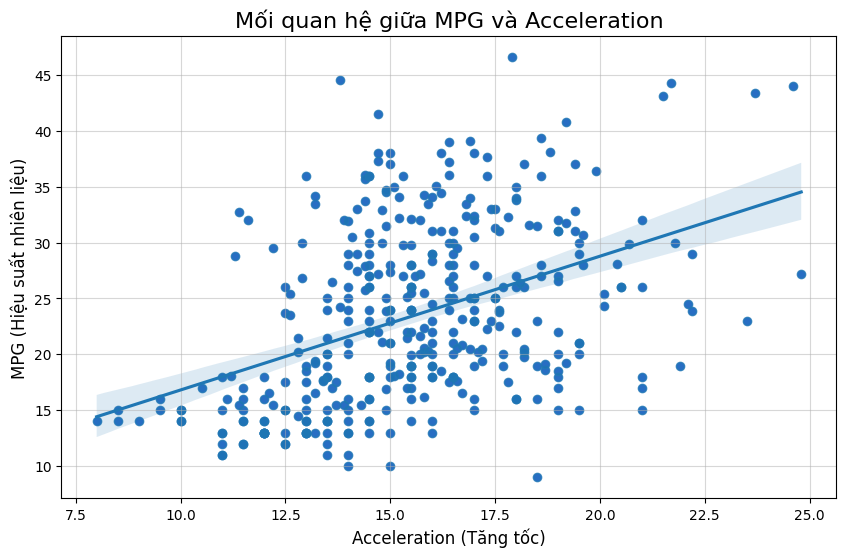

MPG trung bình theo các nhóm tăng tốc:
acceleration_bins
(7.983, 11.36]    15.185714
(11.36, 14.72]    20.879259
(14.72, 18.08]    25.243195
(18.08, 21.44]    25.637500
(21.44, 24.8]     31.945455
Name: mpg, dtype: float64


C:\Users\Anh Quan\AppData\Local\Temp\ipykernel_15068\132726017.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mpg_by_accel = df.groupby('acceleration_bins')['mpg'].mean()


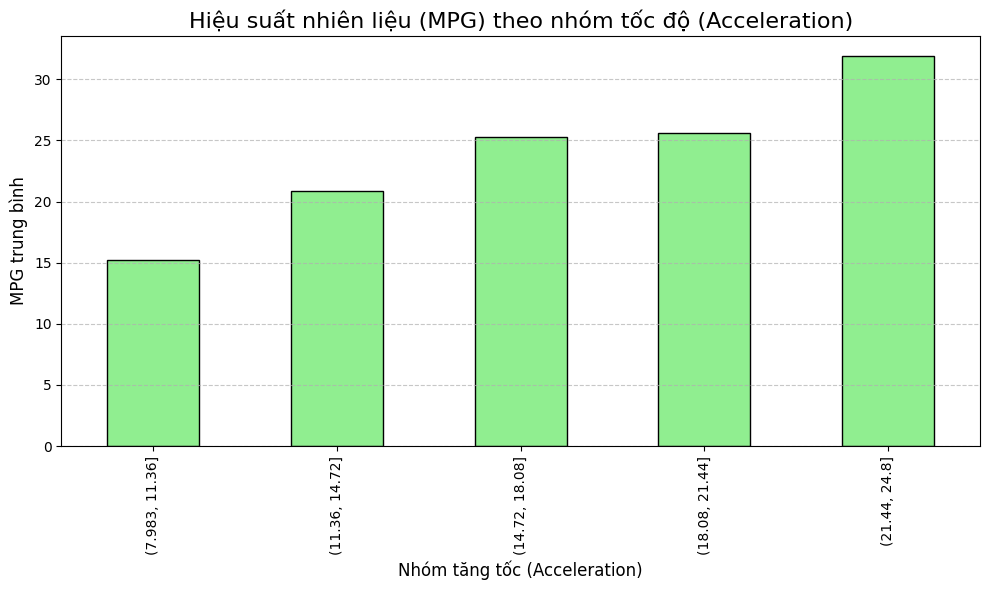

In [75]:
# 2. Trực quan hóa mối quan hệ
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='acceleration', y='mpg', color='blue', alpha=0.7)
sns.regplot(data=df, x='acceleration', y='mpg')
plt.title('Mối quan hệ giữa MPG và Acceleration', fontsize=16)
plt.xlabel('Acceleration (Tăng tốc)', fontsize=12)
plt.ylabel('MPG (Hiệu suất nhiên liệu)', fontsize=12)
plt.grid(alpha=0.5)
plt.show()

# 3. Phân tích nhóm acceleration và mpg
# Chia acceleration thành các nhóm (bins)
df['acceleration_bins'] = pd.cut(df['acceleration'], bins=5)

# Tính trung bình MPG trong từng nhóm
mpg_by_accel = df.groupby('acceleration_bins')['mpg'].mean()
print("MPG trung bình theo các nhóm tăng tốc:")
print(mpg_by_accel)

# 4. Vẽ biểu đồ MPG theo nhóm acceleration
mpg_by_accel.plot(kind='bar', color='lightgreen', edgecolor='black', figsize=(10, 6))
plt.title('Hiệu suất nhiên liệu (MPG) theo nhóm tốc độ (Acceleration)', fontsize=16)
plt.xlabel('Nhóm tăng tốc (Acceleration)', fontsize=12)
plt.ylabel('MPG trung bình', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

qua đây chúng ta có thể thấy được là đi càng ổn định thì mức độ tiết kiệm càng cao. Sự thay đổi tốc độ càng lớn thì lượng xăng tiêu thụ càng lớn